In [60]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from requests import get
from time import sleep
from random import randint
from IPython.core.display import clear_output
from time import time;start_time=time()
from warnings import warn
import matplotlib.pyplot as plt

In [62]:
print("TR Aravindan")
print("19MIA1061")

TR Aravindan
19MIA1061


In [46]:
#Movies website
url="http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1"
response = get(url,headers = {"Accept-Language": "en-US, en;q=0.5"})
print(response.text[:500])




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle"


In [48]:
headers = {"Accept-Language": "en-US, en;q=0.5"}

In [19]:
soup = BeautifulSoup(response.text,'html.parser')

In [20]:
#Total movies in one page
movies = soup.find_all('div',class_="lister-item mode-advanced")
print(len(movies))

50


In [6]:
#all tags in one movie
movie1 = movies[0]
movie1

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt3315342/"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>
<p class="text-muted">
<span class="certificate">A</span>
<span class="ghost">|</span>
<span class="runtime">137 min</span>
<span class="ghost">|</span>
<span class="genre">
Act

In [43]:
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2018)]

In [50]:
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every year in the interval 2000-2017
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:

        # Make a get request
        response = get('http://www.imdb.com/search/title?release_date=' + year_url +
        '&sort=num_votes,desc&page=' + page, headers = headers)

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if requests > 10:
            warn('Number of requests was greater than expected.')
            break

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

Request:26; Frequency: 0.07386669725902488 requests/s


In [53]:
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(movie_ratings.info())
movie_ratings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      472 non-null    object 
 1   year       472 non-null    object 
 2   imdb       472 non-null    float64
 3   metascore  472 non-null    int64  
 4   votes      472 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 18.6+ KB
None


,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1314519
1,Memento,(2000),8.4,80,1105175
2,Snatch,(2000),8.3,55,769617
3,Requiem for a Dream,(2000),8.3,68,752100
4,X-Men,(2000),7.4,64,563672
...,...,...,...,...,...
467,John Q,(2002),7.1,30,121743
468,About Schmidt,(2002),7.1,85,121414
469,My Big Fat Greek Wedding,(2002),6.5,62,118428
470,The Time Machine,(2002),6.0,42,117437


In [54]:
movie_ratings['year'].unique()

array(['(2000)', '(I) (2000)', '(2001)', '(2002)'], dtype=object)

In [55]:
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)

In [56]:
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]

,imdb,metascore
min,5.3,24.0
max,8.8,96.0


In [57]:
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head(3)

,movie,year,imdb,metascore,votes,n_imdb
0,Gladiator,2000,8.5,67,1314519,85.0
1,Memento,2000,8.4,80,1105175,84.0
2,Snatch,2000,8.3,55,769617,83.0


In [58]:
movie_ratings.to_csv('movie_ratings.csv')

No handles with labels found to put in legend.


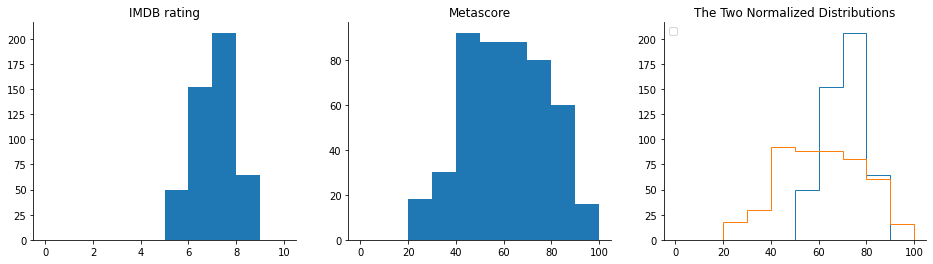

In [61]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes
ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')
ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')
ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()